In [1]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings     # for supressing a warning when importing large files
warnings.filterwarnings("ignore")
from pylab import rcParams
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8

In [2]:
# Load Sample 100+ Dataset
Train=pd.read_csv("Datasets/health/train_labels.csv")
Train_Beneficiarydata=pd.read_csv("Datasets/health/train_beni_sample.csv")
Train_Inpatientdata=pd.read_csv("Datasets/health/train_inpatient_sample.csv")
Train_Outpatientdata=pd.read_csv("Datasets/health/train_outpatient_sample.csv")

# # Load Train Dataset
# Train=pd.read_csv("./input/Train-1542865627584.csv")
# Train_Beneficiarydata=pd.read_csv("./input/Train_Beneficiarydata-1542865627584.csv")
# Train_Inpatientdata=pd.read_csv("./input/Train_Inpatientdata-1542865627584.csv")
# Train_Outpatientdata=pd.read_csv("./input/Train_Outpatientdata-1542865627584.csv")

# Load Test Dataset
# Test=pd.read_csv("./input/Test-1542969243754.csv")
# Test_Beneficiarydata=pd.read_csv("./input/Test_Beneficiarydata-1542969243754.csv")
# Test_Inpatientdata=pd.read_csv("./input/Test_Inpatientdata-1542969243754.csv")
# Test_Outpatientdata=pd.read_csv("./input/Test_Outpatientdata-1542969243754.csv")

In [3]:
## Lets Check Shape of datasets 

print('Shape of Train data :',Train.shape) # potential fraud by provider
print('Shape of Train_Beneficiarydata data :',Train_Beneficiarydata.shape) # beneficiary data
print('Shape of Train_Inpatientdata data :',Train_Inpatientdata.shape) # inpatient data
print('Shape of Train_Outpatientdata data :',Train_Outpatientdata.shape) # outpatient data

# print('Shape of Test data :',Test.shape)
# print('Shape of Test_Beneficiarydata data :',Test_Beneficiarydata.shape)
# print('Shape of Test_Inpatientdata data :',Test_Inpatientdata.shape)
# print('Shape of Test_Outpatientdata data :',Test_Outpatientdata.shape)

Shape of Train data : (5410, 2)
Shape of Train_Beneficiarydata data : (138556, 25)
Shape of Train_Inpatientdata data : (40474, 30)
Shape of Train_Outpatientdata data : (517737, 27)


In [4]:
df_outpatient = pd.merge(Train_Beneficiarydata, Train_Outpatientdata, on='BeneID', how='left')
df_outpatient_fraud = pd.merge(df_outpatient, Train, on='Provider', how='left')
df_outpatient_fraud.dropna(subset=['PotentialFraud'], inplace=True)
df_outpatient_fraud.reset_index(drop=True, inplace=True)

In [5]:
print(df_outpatient.shape)
print(df_outpatient_fraud.shape)
df_outpatient_fraud.head()

(522313, 51)
(517737, 52)


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,PotentialFraud
0,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,56409,Yes
1,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,79380,No
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,No
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Yes
4,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,71947,Yes


In [6]:
df_outpatient_fraud['ClaimStartDt'] = pd.to_datetime(df_outpatient_fraud['ClaimStartDt']).dt.date
df_outpatient_fraud['ClaimStartDt'] = df_outpatient_fraud['ClaimStartDt'].astype('datetime64')
df_outpatient_fraud['ClaimEndDt'] = pd.to_datetime(df_outpatient_fraud['ClaimEndDt']).dt.date
df_outpatient_fraud['ClaimEndDt'] = df_outpatient_fraud['ClaimEndDt'].astype('datetime64')
df_outpatient_fraud['Gender'] = df_outpatient_fraud['Gender'].astype('category')
df_outpatient_fraud['Race'] = df_outpatient_fraud['Race'].astype('category')
df_outpatient_fraud['State'] = df_outpatient_fraud['State'].astype('category')
df_outpatient_fraud['County'] = df_outpatient_fraud['County'].astype('category')
df_outpatient_fraud['ClmAdmitDiagnosisCode'] = df_outpatient_fraud['ClmAdmitDiagnosisCode'].astype('category')
df_outpatient_fraud['PotentialFraud'] = df_outpatient_fraud['PotentialFraud'].astype('category')
df_outpatient_fraud['PotentialFraudCode'] = df_outpatient_fraud['PotentialFraud'].cat.codes

In [7]:
df_outpatient_fraud.dtypes

BeneID                                     object
DOB                                        object
DOD                                        object
Gender                                   category
Race                                     category
RenalDiseaseIndicator                      object
State                                    category
County                                   category
NoOfMonths_PartACov                         int64
NoOfMonths_PartBCov                         int64
ChronicCond_Alzheimer                       int64
ChronicCond_Heartfailure                    int64
ChronicCond_KidneyDisease                   int64
ChronicCond_Cancer                          int64
ChronicCond_ObstrPulmonary                  int64
ChronicCond_Depression                      int64
ChronicCond_Diabetes                        int64
ChronicCond_IschemicHeart                   int64
ChronicCond_Osteoporasis                    int64
ChronicCond_rheumatoidarthritis             int64


In [8]:
df_outpatient_fraud[['BeneID', 'Provider', 'ClaimStartDt', 'ClaimEndDt', 'PotentialFraud', 'PotentialFraudCode']]

,BeneID,Provider,ClaimStartDt,ClaimEndDt,PotentialFraud,PotentialFraudCode
0,BENE11002,PRV56011,2009-10-11,2009-10-11,Yes,1
1,BENE11003,PRV57610,2009-02-12,2009-02-12,No,0
2,BENE11003,PRV57595,2009-06-27,2009-06-27,No,0
3,BENE11004,PRV56011,2009-01-06,2009-01-06,Yes,1
4,BENE11004,PRV56011,2009-01-22,2009-01-22,Yes,1
...,...,...,...,...,...,...
517732,BENE159198,PRV53699,2009-08-06,2009-08-06,No,0
517733,BENE159198,PRV53702,2009-08-29,2009-08-29,No,0
517734,BENE159198,PRV53676,2009-09-24,2009-09-24,No,0
517735,BENE159198,PRV53689,2009-10-18,2009-10-18,No,0


In [9]:
print(df_outpatient_fraud.keys())

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt',
       'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10

In [10]:
df_outpatient_fraud[['BeneID', 'Provider', 'ClaimStartDt', 'ClaimEndDt', 'ClmAdmitDiagnosisCode', 'PotentialFraud', 'PotentialFraudCode']]

,BeneID,Provider,ClaimStartDt,ClaimEndDt,ClmAdmitDiagnosisCode,PotentialFraud,PotentialFraudCode
0,BENE11002,PRV56011,2009-10-11,2009-10-11,56409,Yes,1
1,BENE11003,PRV57610,2009-02-12,2009-02-12,79380,No,0
2,BENE11003,PRV57595,2009-06-27,2009-06-27,NaN,No,0
3,BENE11004,PRV56011,2009-01-06,2009-01-06,NaN,Yes,1
4,BENE11004,PRV56011,2009-01-22,2009-01-22,71947,Yes,1
...,...,...,...,...,...,...,...
517732,BENE159198,PRV53699,2009-08-06,2009-08-06,NaN,No,0
517733,BENE159198,PRV53702,2009-08-29,2009-08-29,NaN,No,0
517734,BENE159198,PRV53676,2009-09-24,2009-09-24,NaN,No,0
517735,BENE159198,PRV53689,2009-10-18,2009-10-18,NaN,No,0


In [11]:
df_outpatient_fraud0 = df_outpatient_fraud.dropna(subset=['ClmAdmitDiagnosisCode'])
df_outpatient_fraud0[['BeneID', 'Provider', 'ClaimStartDt', 'ClaimEndDt', 'ClmAdmitDiagnosisCode', 'PotentialFraud', 'PotentialFraudCode']]

,BeneID,Provider,ClaimStartDt,ClaimEndDt,ClmAdmitDiagnosisCode,PotentialFraud,PotentialFraudCode
0,BENE11002,PRV56011,2009-10-11,2009-10-11,56409,Yes,1
1,BENE11003,PRV57610,2009-02-12,2009-02-12,79380,No,0
4,BENE11004,PRV56011,2009-01-22,2009-01-22,71947,Yes,1
11,BENE11004,PRV56011,2009-09-06,2009-09-06,99811,Yes,1
16,BENE11005,PRV54080,2009-02-02,2009-02-02,2724,No,0
...,...,...,...,...,...,...,...
517712,BENE159196,PRV51836,2009-08-07,2009-08-07,V7612,Yes,1
517724,BENE159198,PRV53676,2008-12-23,2009-01-12,3009,No,0
517725,BENE159198,PRV53676,2009-02-02,2009-02-02,1991,No,0
517728,BENE159198,PRV53699,2009-03-30,2009-04-19,71946,No,0


In [12]:
def calc_fraud_agg_by_columns(df, columns):
    dict_fraud_agg = {}
    
    df_temp = df.groupby(columns)['PotentialFraud'].value_counts().unstack().fillna(0)
    
    for row in df_temp.iterrows():
        count_yesno = row[1]['No'] + row[1]['Yes']
        count_yes = row[1]['Yes']
        fraud_ratio = count_yes / count_yesno
        dict_fraud_agg[row[0]] = [count_yesno, count_yes, fraud_ratio]
        for i, _ in enumerate(columns):
            dict_fraud_agg[row[0]].insert(i, row[i])
    
    new_columns = columns.copy()
    new_columns.append('count_cases')
    new_columns.append('count_fraud_cases')
    new_columns.append('ratio_fraud_cases')
    return pd.DataFrame.from_dict(dict_fraud_agg, orient='index', columns=new_columns).reset_index(drop=True)
    
# df_fraud_ClmAdmitDiagnosisCode = calc_fraud_agg_by_columns(df_outpatient_fraud0, ['ClmAdmitDiagnosisCode'])
# df_fraud_ClmAdmitDiagnosisCode.sort_values(by=['ratio_fraud_cases', 'count_cases'], ascending=False, inplace=True)

# print(df_fraud_ClmAdmitDiagnosisCode.shape)
# print(df_fraud_ClmAdmitDiagnosisCode.head(100))

In [13]:
def draw_line_plot(df, x, y, title, xlabel, ylabel):
    plt.figure(figsize=(10,10), dpi=80)
    sns.catplot(kind="bar", data=df, x=x, y=y)
    
    plt.title(title, fontsize=18)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

(3715, 4)
(6, 4)


<Figure size 800x800 with 0 Axes>

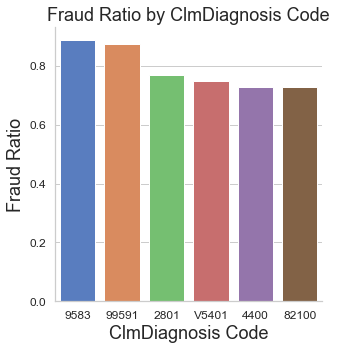

In [14]:
df_fraud_ClmAdmitDiagnosisCode = calc_fraud_agg_by_columns(df_outpatient_fraud0, ['ClmAdmitDiagnosisCode'])
print(df_fraud_ClmAdmitDiagnosisCode.shape)

df_fraud_ClmAdmitDiagnosisCode.sort_values(by=['ratio_fraud_cases', 'count_cases'], ascending=False, inplace=True)
df_fraud_ClmAdmitDiagnosisCode = df_fraud_ClmAdmitDiagnosisCode[df_fraud_ClmAdmitDiagnosisCode['count_cases'] > 7]
df_fraud_ClmAdmitDiagnosisCode = df_fraud_ClmAdmitDiagnosisCode[df_fraud_ClmAdmitDiagnosisCode['ratio_fraud_cases'] > 0.7]

print(df_fraud_ClmAdmitDiagnosisCode.shape)
draw_line_plot(df_fraud_ClmAdmitDiagnosisCode, 'ClmAdmitDiagnosisCode', 'ratio_fraud_cases', 'Fraud Ratio by ClmDiagnosis Code', 'ClmDiagnosis Code', 'Fraud Ratio')

(3715, 4)
(16, 4)


<Figure size 800x800 with 0 Axes>

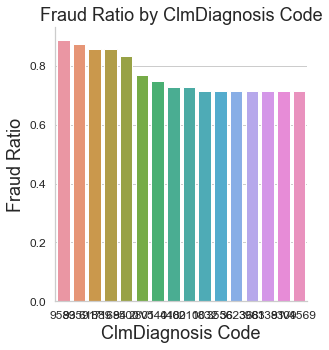

In [15]:
df_fraud_ClmAdmitDiagnosisCode = calc_fraud_agg_by_columns(df_outpatient_fraud0, ['ClmAdmitDiagnosisCode'])
print(df_fraud_ClmAdmitDiagnosisCode.shape)

df_fraud_ClmAdmitDiagnosisCode.sort_values(by=['ratio_fraud_cases', 'count_cases'], ascending=False, inplace=True)
df_fraud_ClmAdmitDiagnosisCode = df_fraud_ClmAdmitDiagnosisCode[df_fraud_ClmAdmitDiagnosisCode['count_cases'] > 5]
df_fraud_ClmAdmitDiagnosisCode = df_fraud_ClmAdmitDiagnosisCode[df_fraud_ClmAdmitDiagnosisCode['ratio_fraud_cases'] > 0.7]

print(df_fraud_ClmAdmitDiagnosisCode.shape)
draw_line_plot(df_fraud_ClmAdmitDiagnosisCode, 'ClmAdmitDiagnosisCode', 'ratio_fraud_cases', 'Fraud Ratio by ClmDiagnosis Code', 'ClmDiagnosis Code', 'Fraud Ratio')

In [16]:
def drawCorrellogram(df):
    columns = df.columns.tolist()
    df_temp = df[columns]
    
    # Plot
    plt.figure(figsize=(12,12), dpi=80)
    sns.set(font_scale=0.9)
    sns.heatmap(df_temp.corr(), xticklabels=df_temp.corr().columns, yticklabels=df_temp.corr().columns, cmap='RdYlGn', center=0, annot=True)

    # Decorations
    plt.show()

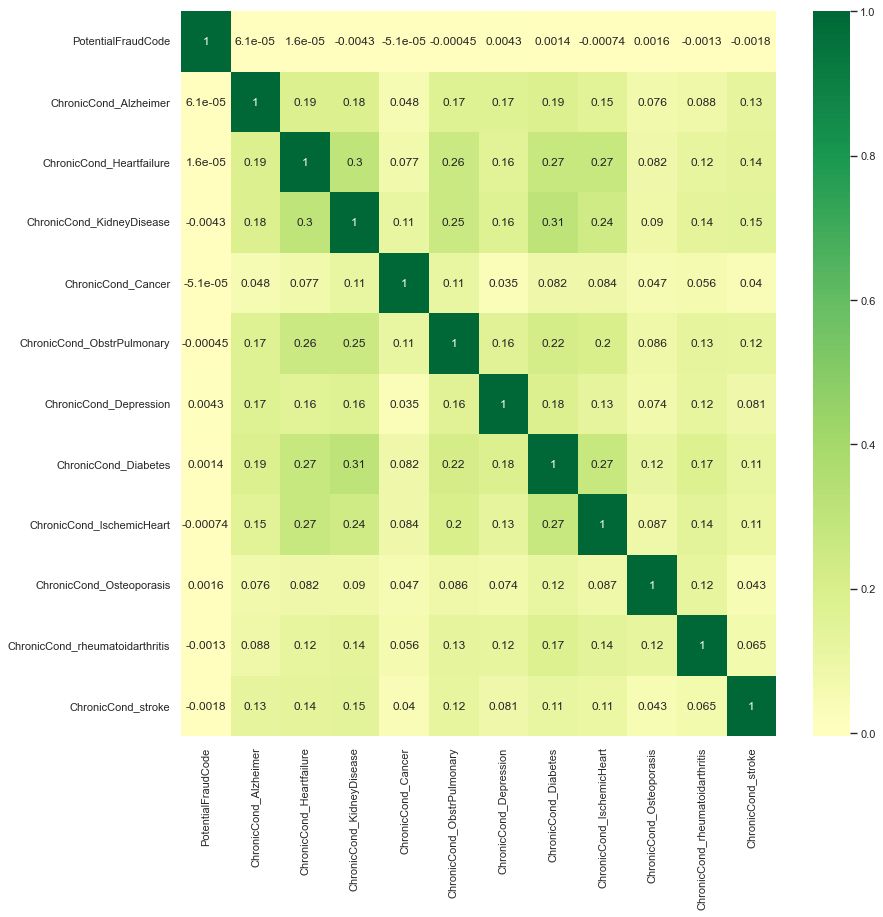

In [17]:
drawCorrellogram(df_outpatient_fraud[['PotentialFraudCode',
    'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
    'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
    'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
    'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
    'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
    'ChronicCond_stroke']])

In [18]:
df_outpatient_fraud.keys()

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt',
       'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10

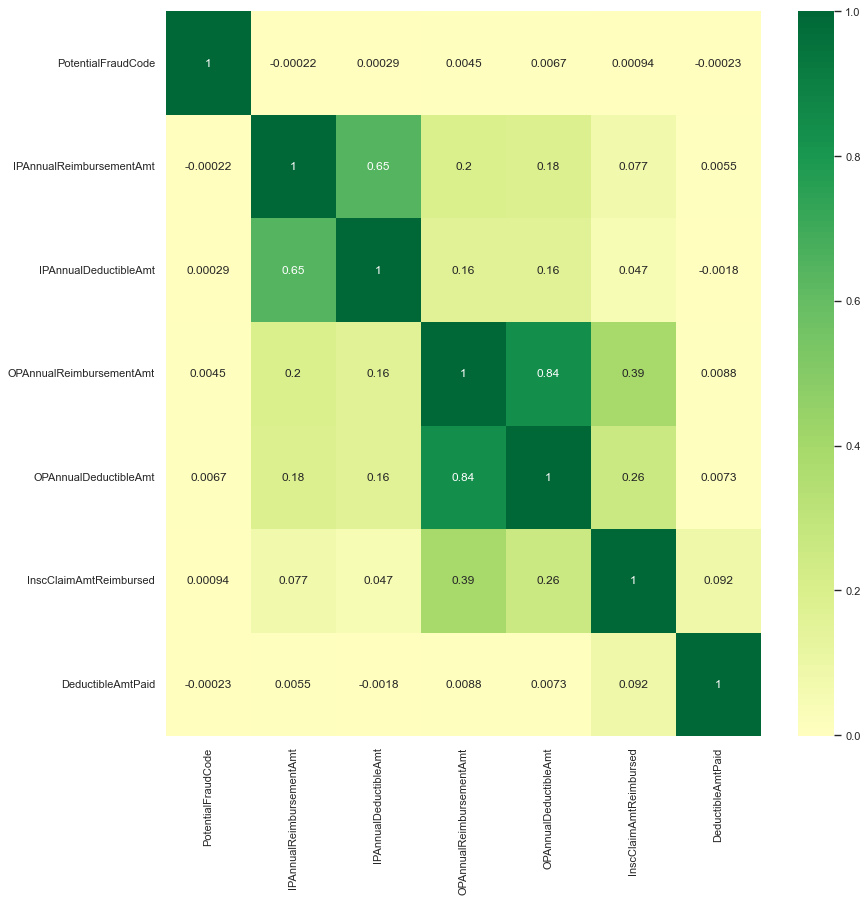

In [19]:
drawCorrellogram(df_outpatient_fraud[['PotentialFraudCode',
    'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 
    'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt',
    'InscClaimAmtReimbursed', 'DeductibleAmtPaid']])

(9, 4)
(9, 4)


<Figure size 800x800 with 0 Axes>

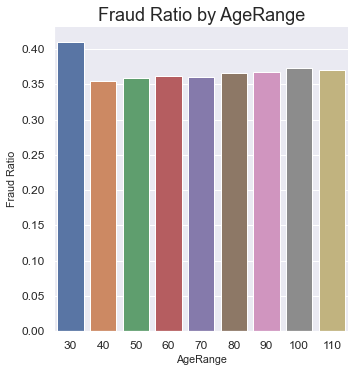

,AgeRange,count_cases,count_fraud_cases,ratio_fraud_cases
0,30,580,238,0.410345
1,40,8124,2875,0.353890
2,50,15295,5498,0.359464
3,60,29157,10530,0.361148
4,70,55888,20154,0.360614


In [20]:
df_outpatient_fraud['Age'] = df_outpatient_fraud['DOB'].apply(lambda x : 2022 - int(x[0:4]))
df_outpatient_fraud['AgeRange'] = df_outpatient_fraud['Age'].apply(lambda x : math.floor(x/10) * 10)
df_outpatient_fraud['AgeRange'] = df_outpatient_fraud['AgeRange'].astype('category')
df_outpatient_fraud[['Age', 'AgeRange']].head(10)

df_fraud_AgeRange = calc_fraud_agg_by_columns(df_outpatient_fraud, ['AgeRange'])
print(df_fraud_AgeRange.shape)

# df_fraud_AgeRange.sort_values(by=['ratio_fraud_cases', 'count_cases'], ascending=False, inplace=True)
# df_fraud_AgeRange = df_fraud_AgeRange[df_fraud_AgeRange['count_cases'] > 180]
# df_fraud_AgeRange = df_fraud_AgeRange[df_fraud_AgeRange['ratio_fraud_cases'] > 0.5]

print(df_fraud_AgeRange.shape)
draw_line_plot(df_fraud_AgeRange, 'AgeRange', 'ratio_fraud_cases', 'Fraud Ratio by AgeRange', 'AgeRange', 'Fraud Ratio')
df_fraud_AgeRange.head()

(12, 4)
(12, 4)


<Figure size 800x800 with 0 Axes>

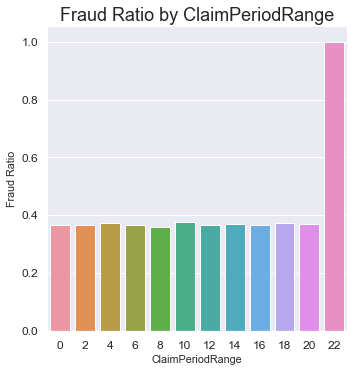

,ClaimPeriodRange,count_cases,count_fraud_cases,ratio_fraud_cases
0,0,465308,170064,0.365487
1,2,6963,2547,0.365791
2,4,3749,1397,0.372633
3,6,3870,1418,0.366408
4,8,2567,927,0.361122


In [21]:
df_outpatient_fraud['ClaimPeriod'] = df_outpatient_fraud.apply(lambda x : x['ClaimEndDt'] - x['ClaimStartDt'], axis=1)
df_outpatient_fraud['ClaimPeriod'] = df_outpatient_fraud['ClaimPeriod'].astype('timedelta64[D]')
df_outpatient_fraud['ClaimPeriodRange'] = df_outpatient_fraud['ClaimPeriod'].apply(lambda x : math.floor(x/2) * 2)
df_outpatient_fraud['ClaimPeriodRange'] = df_outpatient_fraud['ClaimPeriodRange'].astype('category')
df_outpatient_fraud[['ClaimPeriod', 'ClaimPeriodRange']].head(10)

df_fraud_ClaimPeriodRange = calc_fraud_agg_by_columns(df_outpatient_fraud, ['ClaimPeriodRange'])
print(df_fraud_ClaimPeriodRange.shape)

# df_fraud_ClaimPeriodRange.sort_values(by=['ratio_fraud_cases', 'count_cases'], ascending=False, inplace=True)
# df_fraud_ClaimPeriodRange = df_fraud_ClaimPeriodRange[df_fraud_ClaimPeriodRange['count_cases'] > 180]
# df_fraud_ClaimPeriodRange = df_fraud_ClaimPeriodRange[df_fraud_ClaimPeriodRange['ratio_fraud_cases'] > 0.5]

print(df_fraud_ClaimPeriodRange.shape)
draw_line_plot(df_fraud_ClaimPeriodRange, 'ClaimPeriodRange', 'ratio_fraud_cases', 'Fraud Ratio by ClaimPeriodRange', 'ClaimPeriodRange', 'Fraud Ratio')
df_fraud_ClaimPeriodRange.head()

   OPAnnualReimbursementAmt OPReimbursementAmtRange
0                        30                       0
1                        90                       0
2                        90                       0
3                      1810                       0
4                      1810                       0
5                      1810                       0
6                      1810                       0
7                      1810                       0
8                      1810                       0
9                      1810                       0


<Figure size 800x800 with 0 Axes>

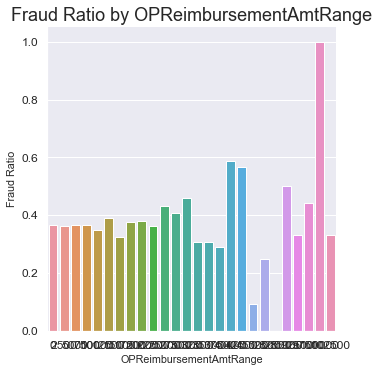

,OPReimbursementAmtRange,count_cases,count_fraud_cases,ratio_fraud_cases
0,0,380403,139171,0.365851
1,2500,90846,33044,0.363736
2,5000,22696,8353,0.368038
3,7500,6687,2455,0.367130
4,10000,2980,1044,0.350336
5,12500,2811,1095,0.389541
6,15000,2251,734,0.326077
7,17500,2327,875,0.376021
8,20000,1782,680,0.381594
9,22500,1507,550,0.364964


In [22]:
df_outpatient_fraud['OPReimbursementAmtRange'] = df_outpatient_fraud['OPAnnualReimbursementAmt'].apply(lambda x : math.floor(x/2500) * 2500)
df_outpatient_fraud['OPReimbursementAmtRange'] = df_outpatient_fraud['OPReimbursementAmtRange'].astype('category')
print(df_outpatient_fraud[['OPAnnualReimbursementAmt', 'OPReimbursementAmtRange']].head(10))

df_fraud_OPReimbursementAmtRange = calc_fraud_agg_by_columns(df_outpatient_fraud, ['OPReimbursementAmtRange'])
draw_line_plot(df_fraud_OPReimbursementAmtRange, 'OPReimbursementAmtRange', 'ratio_fraud_cases', 'Fraud Ratio by OPReimbursementAmtRange', 'OPReimbursementAmtRange', 'Fraud Ratio')
df_fraud_OPReimbursementAmtRange.head(20)

In [23]:
df_outpatient_fraud.to_csv('./output/outpatient_fraud_cleaned.csv', index=False)